In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
print(pd.read_csv("30min_N50_10yr.csv"))

                            date      open      high       low     close  \
0      2015-01-09 09:15:00+05:30   8285.45   8303.00   8277.40   8285.55   
1      2015-01-09 09:45:00+05:30   8285.40   8287.65   8273.95   8281.55   
2      2015-01-09 10:15:00+05:30   8281.50   8291.45   8277.95   8281.35   
3      2015-01-09 10:45:00+05:30   8281.30   8288.85   8279.10   8282.35   
4      2015-01-09 11:15:00+05:30   8282.55   8283.20   8250.20   8255.65   
...                          ...       ...       ...       ...       ...   
19906  2021-03-25 13:15:00+05:30  14295.70  14423.70  14290.30  14412.10   
19907  2021-03-25 13:45:00+05:30  14408.45  14447.20  14376.35  14400.75   
19908  2021-03-25 14:15:00+05:30  14400.70  14432.55  14355.60  14432.55   
19909  2021-03-25 14:45:00+05:30  14432.20  14493.05  14274.15  14299.00   
19910  2021-03-25 15:15:00+05:30  14298.90  14349.40  14287.55  14346.40   

       volume  
0           0  
1           0  
2           0  
3           0  
4      

In [31]:
df = pd.read_csv('30min_N50_10yr.csv', usecols=['date', 'close'])
df.head(20)

,date,close
0,2015-01-09 09:15:00+05:30,8285.55
1,2015-01-09 09:45:00+05:30,8281.55
2,2015-01-09 10:15:00+05:30,8281.35
3,2015-01-09 10:45:00+05:30,8282.35
4,2015-01-09 11:15:00+05:30,8255.65
5,2015-01-09 11:45:00+05:30,8221.85
6,2015-01-09 12:15:00+05:30,8213.50
7,2015-01-09 12:45:00+05:30,8245.85
8,2015-01-09 13:15:00+05:30,8244.10
9,2015-01-09 13:45:00+05:30,8225.20


In [35]:
# Process the date column to a datetime data type and set it as an index
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
df.date = df.date.apply(lambda x: parser(x[:19]))
df = df.set_index('date')

df.head(5)

,close
date,
2015-01-09 09:15:00,8285.55
2015-01-09 09:45:00,8281.55
2015-01-09 10:15:00,8281.35
2015-01-09 10:45:00,8282.35
2015-01-09 11:15:00,8255.65


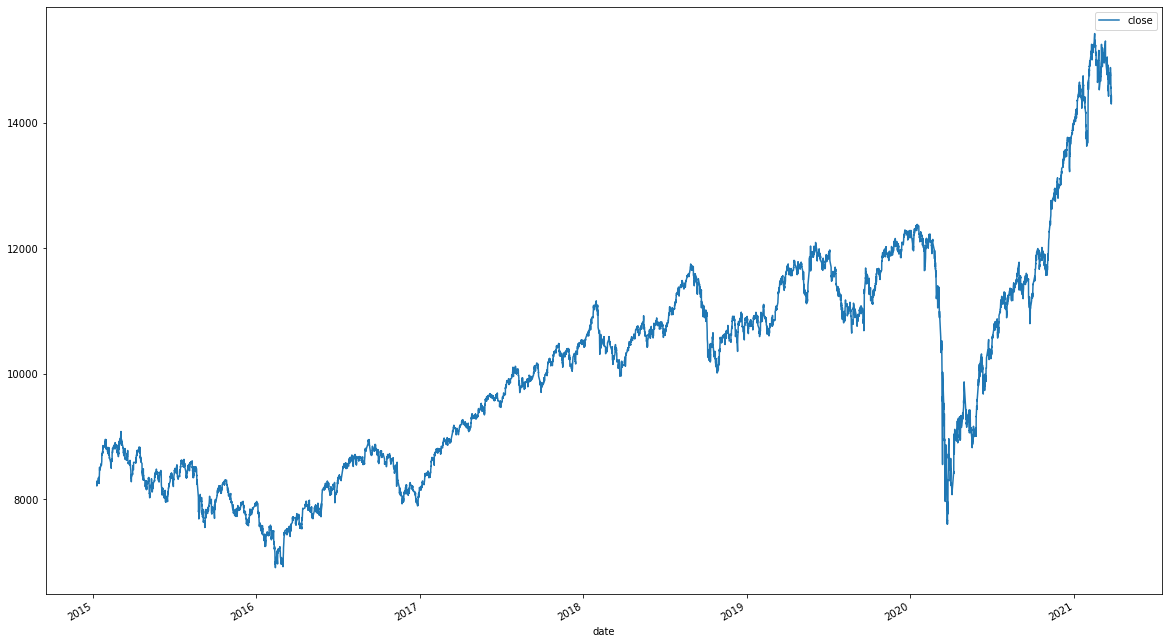

In [36]:
# Plot the data set and conduct a time series anaylsis using  partial auto-correlation and auto-correlation plots
df.plot(figsize=(20,12))
plt.savefig('plot.png')
plt.show()

In [37]:
df.index

DatetimeIndex(['2015-01-09 09:15:00', '2015-01-09 09:45:00',
               '2015-01-09 10:15:00', '2015-01-09 10:45:00',
               '2015-01-09 11:15:00', '2015-01-09 11:45:00',
               '2015-01-09 12:15:00', '2015-01-09 12:45:00',
               '2015-01-09 13:15:00', '2015-01-09 13:45:00',
               ...
               '2021-03-25 10:45:00', '2021-03-25 11:15:00',
               '2021-03-25 11:45:00', '2021-03-25 12:15:00',
               '2021-03-25 12:45:00', '2021-03-25 13:15:00',
               '2021-03-25 13:45:00', '2021-03-25 14:15:00',
               '2021-03-25 14:45:00', '2021-03-25 15:15:00'],
              dtype='datetime64[ns]', name='date', length=19911, freq=None)

In [38]:
# For a daily price analysis we save only the close price for the day
data = df[(df.index.minute==15)&(df.index.hour==15)]
data

,close
date,
2015-01-09 15:15:00,8280.25
2015-01-12 15:15:00,8326.55
2015-01-13 15:15:00,8303.80
2015-01-14 15:15:00,8287.75
2015-01-15 15:15:00,8461.15
...,...
2021-03-19 15:15:00,14733.55
2021-03-22 15:15:00,14747.15
2021-03-23 15:15:00,14807.30


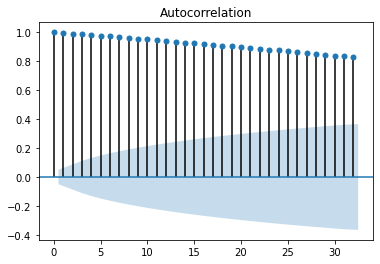

In [39]:
# For plotting auto-correlations we use statsmodels library
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(data['close'])
plt.savefig('acf.png')
plt.show()

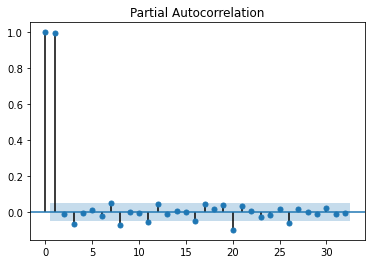

In [40]:
plot_pacf(data['close'])
plt.savefig('pacf.png')
plt.show()

<ipython-input-41-5b3c24b297c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_return'] = data.close.apply(np.log1p).diff()


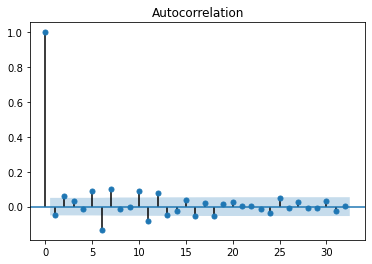

In [41]:
# There is evidence for time-dependence and serial correlation.
# We should convert the prices to a log-price for symmetry around zero and difference the data for stationarity

data['log_return'] = data.close.apply(np.log1p).diff()
plot_acf(data['log_return'].dropna())
plt.savefig('dacf.png')
plt.show()

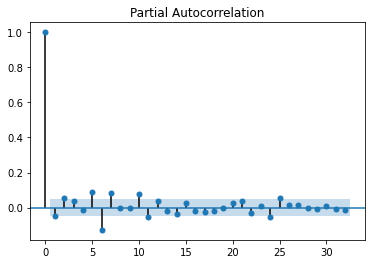

In [42]:
plot_pacf(data['log_return'].dropna())
plt.savefig('dacf.png')
plt.show()